<h1 style='text-align:center;color:red;'>Loan Approval Prediction Using Machine Learning Python</h1>
<h1>Problem Statement</h1>
    <p>
        Design and implement a <strong>Loan Approval Prediction Model</strong> to determine whether a loan application should be approved or denied based on the applicant's demographic, financial, and credit history information. 
        The goal is to build a classification model that predicts the loan approval status (<code>loan_status</code>) using features such as the applicant's age, gender, education, income, employment experience, home ownership status, 
        loan amount, loan intent, interest rate, and credit history. This model can help financial institutions automate the loan approval process, reduce risk, and improve decision-making.
    </p>
    <h2>Dataset Description</h2>
    <p>
        The dataset contains detailed information about individuals applying for loans, their financial attributes, and loan-related metrics. Below is a description of the dataset:
    </p>
    <table>
        <thead>
            <tr>
                <th>Feature</th>
                <th>Description</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td><code>person_age</code></td>
                <td>Age of the loan applicant in years.</td>
            </tr>
            <tr>
                <td><code>person_gender</code></td>
                <td>Gender of the loan applicant (male or female).</td>
            </tr>
            <tr>
                <td><code>person_education</code></td>
                <td>Education level of the loan applicant (e.g., High School, Bachelor, Master).</td>
            </tr>
            <tr>
                <td><code>person_income</code></td>
                <td>Annual income of the loan applicant (in USD).</td>
            </tr>
            <tr>
                <td><code>person_emp_exp</code></td>
                <td>Number of years of employment experience of the applicant.</td>
            </tr>
            <tr>
                <td><code>person_home_ownership</code></td>
                <td>Home ownership status of the applicant (e.g., RENT, OWN, MORTGAGE).</td>
            </tr>
            <tr>
                <td><code>loan_amnt</code></td>
                <td>Amount of loan requested (in USD).</td>
            </tr>
            <tr>
                <td><code>loan_intent</code></td>
                <td>The purpose or intent of the loan (e.g., PERSONAL, EDUCATION, MEDICAL).</td>
            </tr>
            <tr>
                <td><code>loan_int_rate</code></td>
                <td>Interest rate of the loan (as a percentage).</td>
            </tr>
            <tr>
                <td><code>loan_percent_income</code></td>
                <td>Loan amount as a percentage of the applicant's annual income.</td>
            </tr>
            <tr>
                <td><code>cb_person_cred_hist_length</code></td>
                <td>Length of the applicant's credit history (in years).</td>
            </tr>
            <tr>
                <td><code>credit_score</code></td>
                <td>Credit score of the applicant.</td>
            </tr>
            <tr>
                <td><code>previous_loan_defaults_on_file</code></td>
                <td>Whether the applicant has previous loan defaults on record (Yes or No).</td>
            </tr>
            <tr>
                <td><code>loan_status</code></td>
                <td>Target variable indicating whether the loan was approved (1) or denied (0).</td>
            </tr>
        </tbody>
    </table>
    <h2>Use Case</h2>
    <p>
        This model can assist financial institutions and lenders by:
    </p>
    <ul>
        <li>Automating the loan approval process for faster decision-making.</li>
        <li>Identifying high-risk loan applications based on applicant profiles.</li>
        <li>Improving customer satisfaction by minimizing manual interventions.</li>
        <li>Enhancing financial stability by reducing the likelihood of defaults.</li>
    </ul>
    <p>
        This system can be integrated into banking and financial software to streamline operations and support data-driven decisions.
    </p>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
#Let Look Overview Data

def detect_data_types(df):
    """
    Detect whether the data type for each column in the DataFrame is discrete, continuous, or unknown.

    Parameters:
        df (pd.DataFrame): DataFrame containing the columns to analyze.

    Returns:
        dict: A dictionary where keys are column names and values are the data types ('discrete', 'continuous', 'unknown').
    """
    discrete_text_container=[]
    discrete_numeric_container=[]
    continuous_container=[]
    unknown_container=[]
    
    

    for column in df.columns:
        # Drop NaN values for analysis
        col_data = df[column].dropna()
        
        # Get unique value counts
        unique_values = col_data.nunique()

        # Check if the column is numerical (int or float)
        if col_data.dtype in ['int64', 'float64']:
            # For integer-based data with few unique values, it's likely discrete
            if col_data.dtype == 'int64' and unique_values / len(col_data) < 0.05:
                discrete_numeric_container.append(column)
            else:
                continuous_container.append(column)
                
        
        # Check if the column is categorical/text data
        elif col_data.dtype == 'object' or col_data.dtype.name == 'category':
            discrete_text_container.append(column)
        
        # If there are very few unique values compared to the length, treat it as discrete
        elif unique_values / len(col_data) < 0.05:
            discrete_text_container.append(column)
        
        # If the data doesn't fit into any category, mark it as 'unknown'
        else:
            unknown_container.append(column)
    
    return [discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
            



def dataset_analysis(df,target_column=None,type=None):


    # Total rows
    total_rows = len(df)
    # Count of unique rows
    unique_rows = len(df.drop_duplicates())
    # Count of duplicate rows
    duplicate_rows = total_rows - unique_rows
    # Calculate percentages
    unique_percentage = (unique_rows / total_rows) * 100
    duplicate_percentage = (duplicate_rows / total_rows) * 100

    print('*'*80)
    print('Basic Analysis Of Dataframe')
    print('*'*80)

    
    print('='*50)
    print('Dataset Shape (Rows & Columns)')
    print('='*50)
    print('Rows :-',df.shape[0])
    print('Columns :-',df.shape[1])
    print(f"Unique Rows: {unique_rows} ({unique_percentage:.2f}%)")
    print(f"Duplicate Rows: {duplicate_rows} ({duplicate_percentage:.2f}%)")


    # Data type-wise column count
    print("\n" + "="*50)
    print("Data Type Wise Column Count")
    print("="*50)
    dtype_count = df.dtypes.value_counts()
    print(dtype_count)
    


    # Discrete And Continous Data Analysis
    print("\n" + "="*50)
    print("Discrete And Continous Data Analysis")
    print("="*50)
    dtype_count = df.columns
    dectectDataTypeObj=detect_data_types(df)

     # Extract containers
    discrete_text_columns, discrete_numeric_columns, continuous_columns, unknown_columns = dectectDataTypeObj

    #[discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
    
    if(len(dectectDataTypeObj)>0):

        #Discrete Text Columns
        if len(dectectDataTypeObj[0])>0:
            print('Discrete Text Columns :',', '.join(discrete_text_columns))
        else:
            print('Discrete Text Columns :','-----')

        print('\n')

        #Discrete Numeric Columns
        if len(dectectDataTypeObj[1])>0:
            print('Discrete Numeric Columns :',', '.join(discrete_numeric_columns) )
        else:
            print('Discrete Numeric Columns :','-----')
        print('\n')

        #Continuous  Columns
        if len(dectectDataTypeObj[2])>0:
            print('Continuous Columns :',', '.join(continuous_columns))
        else:
            print('Continuous Columns :','-----')

        print('\n')
        
        #Unknown Columns
        if len(dectectDataTypeObj[3])>0:
            print('Unknown Columns :',', '.join(unknown_columns))
        else:
            print('Unknown Columns :','-----')

        

    if len(continuous_columns) > 0:
        

        # Check skewness in numerical columns
        print("\n" + "="*50)
        print("Skewness of Numerical Columns")
        print("="*50)
        skewness = df[continuous_columns].skew()
        
        if skewness.empty:
            print("No numerical columns to check skewness.")
        else:
            for col in skewness.index:
                skew_value = skewness[col]
                
                # Determine the skewness range and flag
                if skew_value > 1:
                    skew_range = "Strong Positive Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value >= 0.5:
                    skew_range = "Mild Positive Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                elif skew_value >= -0.5 and skew_value <= 0.5:
                    skew_range = "Approximately Symmetric"
                    #flag = "No transformation needed"
                    flag=""
                elif skew_value <= -1:
                    skew_range = "Strong Negative Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value <= -0.5:
                    skew_range = "Mild Negative Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                
                print(f"{col}: {skew_value:.2f} -> {skew_range}. {flag}")

        
        
        
            
    else:
        print("No numeric columns available for Skewness Analysis.")


    # Additional information aboutConstant unique values and example entries
    print("\n" + "="*50)
    print("Constant Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) == 1:
                print(f"{col}: {sorted(df[col].unique())}\n")
    

    # Additional information about unique values and example entries
    print("\n" + "="*50)
    print("Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) != 1:
                if len(df[col].unique())<20:
                    print(f"{col}: {sorted(df[col].unique())}\n")
                else:
                    print(f"{col}: This Column have More than 20 uniques values \n")
    
    # Check for null (missing) values and their counts
    print("\n" + "="*50)
    print("Columns with Null Values and Null Value Counts")
    print("="*50)
    null_columns = df.columns[df.isnull().any()]
    if null_columns.empty:
        print("No columns contain null values.")
    else:
        for col in null_columns:
            null_count = df[col].isnull().sum()
            print(f"{col}: {null_count} null values")

    # Check for Imbalance in Custom Target Column
    if target_column and type!='regression':
        print(f"\n{'='*50}\nImbalance Analysis for '{target_column}'\n{'='*50}")
        target_counts = df[target_column].value_counts()
        target_percentage = target_counts / len(df) * 100
    
        print(f"Percentage Distribution:\n{target_percentage}\n")
    
        # Check for Imbalance
        imbalance_ratio = target_counts.min() / target_counts.max()
        print(f"The dataset is {'imbalanced' if imbalance_ratio < 0.25 else 'balanced'} with respect to '{target_column}'.")

      
    
dataset_analysis(df,target_column='loan_status',type="classification") 

********************************************************************************
Basic Analysis Of Dataframe
********************************************************************************
Dataset Shape (Rows & Columns)
Rows :- 45000
Columns :- 14
Unique Rows: 45000 (100.00%)
Duplicate Rows: 0 (0.00%)

Data Type Wise Column Count
float64    6
object     5
int64      3
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file


Discrete Numeric Columns : person_emp_exp, credit_score, loan_status


Continuous Columns : person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length


Unknown Columns : -----

Skewness of Numerical Columns
person_age: 2.55 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
person_income: 34.14 -> Strong Positive Skew. Consider transformation (e.g., log or square root

<h3>Conclusions from Basic Dataframe Analysis</h3>
<ul>
  <li><strong>Dataset Overview:</strong>
    <ul>
      <li>The dataset consists of 45,000 unique rows and 14 columns with no duplicates or missing values.</li>
      <li>Data types: 6 continuous numeric, 3 discrete numeric, and 5 categorical columns.</li>
    </ul>
  </li>
  <li><strong>Data Distribution:</strong>
    <ul>
      <li>The target variable (<code>loan_status</code>) is imbalanced: 77.78% for class 0 (non-default) and 22.22% for class 1 (default). This imbalance requires attention during model training to avoid bias toward the majority class.</li>
    </ul>
  </li>
  <li><strong>Categorical Data:</strong>
    <ul>
      <li>Columns like <code>person_gender</code>, <code>person_education</code>, <code>person_home_ownership</code>, and <code>loan_intent</code> have limited unique categories suitable for one-hot or label encoding.</li>
      <li>Columns like <code>person_emp_exp</code> and <code>credit_score</code> have over 20 unique values, indicating possible discretization or binning for analysis.</li>
    </ul>
  </li>
  <li><strong>Numerical Data Skewness:</strong>
    <ul>
      <li>Most continuous columns (<code>person_age</code>, <code>person_income</code>, <code>loan_amnt</code>, <code>loan_percent_income</code>, <code>cb_person_cred_hist_length</code>) show strong positive skew, suggesting the need for transformations (e.g., log or square root) to improve normality for statistical analysis or modeling.</li>
      <li><code>loan_int_rate</code> is approximately symmetric and does not require transformation.</li>
    </ul>
  </li>
  <li><strong>Quality Check:</strong>
    <ul>
      <li>No null values across all columns. The dataset is complete and ready for preprocessing without requiring imputation.</li>
    </ul>
  </li>
  <li><strong>Modeling Considerations:</strong>
    <ul>
      <li>Handle target imbalance using techniques like SMOTE, undersampling, or weighted models.</li>
      <li>Apply transformations to reduce skewness for improved model performance and interpretability.</li>
      <li>Evaluate categorical variables for meaningful encoding based on unique value distribution.</li>
    </ul>
  </li>
  <li><strong>Conclusion:</strong>
    <ul>
      <li>This analysis indicates the dataset is well-structured but requires preprocessing steps, especially for addressing target imbalance and skewness in numerical features, to ensure robust predictive modeling.</li>
    </ul>
  </li>
</ul>


<h3>EDA(Exploratory Data Analysis)</h3>
<p>Let's Understand the Data in Depth Using Various Statistical and Visualization Techniques</p>


**As you know, we have 14 columns in the dataframe. Hence, dividing columns into multiple sections for Exploratory Data Analysis (EDA) helps identify relationships between variables, ensuring targeted analysis for each category. This approach improves data interpretation, facilitates model selection, and uncovers patterns relevant to the problem at hand.**
<ul>
  <li><strong>1. Personal Information</strong>
    <ul>
      <li>person_age: Age of the applicant</li>
      <li>person_gender: Gender of the applicant</li>
      <li>person_education: Education level of the applicant</li>
      <li>person_home_ownership: Home ownership status (e.g., MORTGAGE, RENT)</li>
      <li>person_emp_exp: Employment experience (in years)</li>
    </ul>
  </li>

  <li><strong>2. Financial Status</strong>
    <ul>
      <li>person_income: Monthly income of the applicant</li>
      <li>credit_score: Credit score of the applicant</li>
      <li>loan_amnt: Requested loan amount</li>
      <li>loan_int_rate: Interest rate associated with the loan</li>
      <li>loan_percent_income: Percentage of income allocated towards loan payment</li>
      <li>cb_person_cred_hist_length: Length of credit history</li>
    </ul>
  </li>

  <li><strong>3. Loan Intent and History</strong>
    <ul>
      <li>loan_intent: Purpose of the loan (e.g., DEBTCONSOLIDATION, EDUCATION, etc.)</li>
      <li>previous_loan_defaults_on_file: Whether the applicant has any previous loan defaults</li>
    </ul>
  </li>

  <li><strong>4. Loan Status</strong>
    <ul>
      <li>loan_status: Whether the loan was approved (1) or not (0)</li>
    </ul>
  </li>
</ul>


<h1 style='color:red;'>Personal Information Customer Analysis</h1>
<p>In this we have one continuous numerical age data and rest are categorical data both text and numerical type</p>

<Axes: xlabel='person_age', ylabel='Density'>

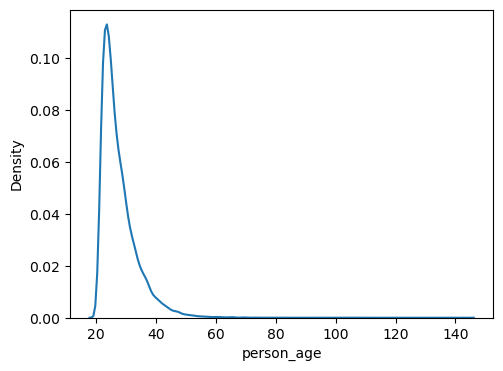

In [4]:
#age analysis
#In our basics analysis we got that age is strong positive skew
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.kdeplot(df,x=df['person_age'])


**The chart displays age variations up to 140 years, which represents an unrealistic value in our customer dataset. According to standard banking regulations and policies, the maximum age eligible for a loan application is typically 60 years. Therefore, in compliance with these guidelines, we will exclude records with ages above 60 from our dataset to ensure consistency and adherence to industry standards**

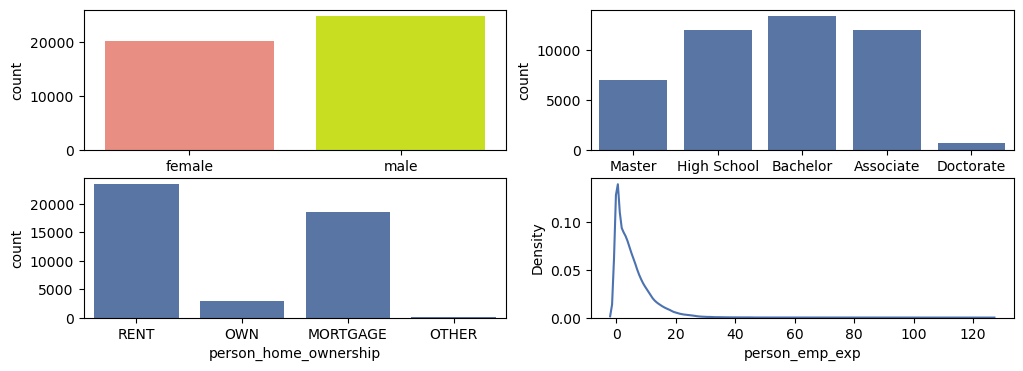

In [5]:

sns.set_palette("deep")
plt.figure(figsize=(12,4))

plt.subplot(2,2,1)
sns.countplot(df,x=df['person_gender'],palette=['#FA8072', '#DFFF00'])

plt.subplot(2,2,2)
sns.countplot(df,x=df['person_education'])


plt.subplot(2,2,3)
sns.countplot(df,x=df['person_home_ownership'])


plt.subplot(2,2,4)
sns.kdeplot(df,x=df['person_emp_exp'])


plt.show()




<ul>
  <li><strong>Person Education:</strong> The majority of applicants have a Bachelor's degree (13,399), followed by an Associate degree (12,028), High School (11,972), Master's (6,980), and Doctorate (621), indicating a higher prevalence of individuals with undergraduate qualifications.</li>
  <li><strong>Person Gender:</strong> There are more male applicants (24,841) than female applicants (20,159), showing a slight gender imbalance in the dataset.</li>
  <li><strong>Person Home Ownership:</strong> Most applicants are renters (23,443), followed by mortgage holders (18,489), with a much smaller proportion owning homes (2,951) or reporting other ownership statuses (117).</li>
  <li><strong>Person Employee Experience:</strong> The chart displays age variations up to 120 years, which represents an unrealistic value in our customer dataset. Therefore, we will only consider customer applicants whose age is less than 60, in line with standard banking policies and regulations.</li>
</ul>


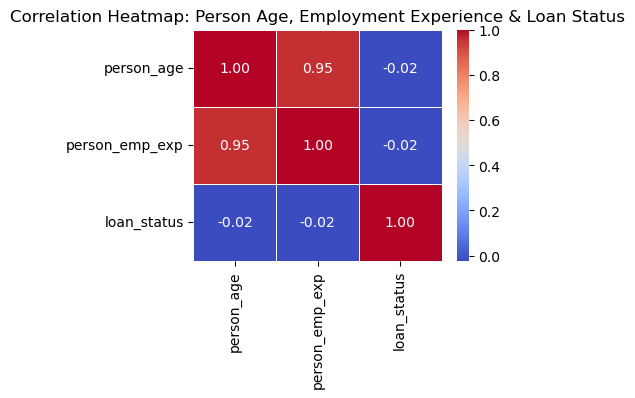

In [6]:
corr_matrix = df[['person_age', 'person_emp_exp', 'loan_status']].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap: Person Age, Employment Experience & Loan Status')
plt.show()

**Based on the above analysis, we observe a strong correlation between age and employment experience, which could introduce bias in the model. As age is a more significant factor in the loan approval process according to banking domain knowledge, we will remove the emp_exp (employment experience) column from the dataset.**

<h4>Perform Outlier Handling On Personal Information Section Features</h4>

In [7]:
df=df.drop(['person_emp_exp'],axis=1)
print('Before Remove Age outlier rows shape ',df.shape)
df=df[df['person_age']<60]
print('Before Remove Age outlier rows shape ',df.shape)

Before Remove Age outlier rows shape  (45000, 13)
Before Remove Age outlier rows shape  (44906, 13)


In [8]:
df.head()

,person_age,person_gender,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


<h1 style='color:red;'>Personal Financial Information Analysis</h1>

In [9]:
dectectDataTypeObj = detect_data_types(df[['person_income','credit_score','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']])

discrete_text_columns, discrete_numeric_columns, continuous_columns, unknown_columns = dectectDataTypeObj

if len(dectectDataTypeObj) > 0:

    # Discrete Text Columns
    if len(dectectDataTypeObj[0]) > 0:
        print('Discrete Text Columns:', ', '.join(discrete_text_columns))
    else:
        print('Discrete Text Columns:', '-----')

    print('\n')

    # Discrete Numeric Columns
    if len(dectectDataTypeObj[1]) > 0:
        print('Discrete Numeric Columns:', ', '.join(discrete_numeric_columns))
    else:
        print('Discrete Numeric Columns:', '-----')
    
    print('\n')

    # Continuous Columns
    if len(dectectDataTypeObj[2]) > 0:
        print('Continuous Columns:', ', '.join(continuous_columns))
    else:
        print('Continuous Columns:', '-----')

    print('\n')

    # Unknown Columns
    if len(dectectDataTypeObj[3]) > 0:
        print('Unknown Columns:', ', '.join(unknown_columns))
    else:
        print('Unknown Columns:', '-----')

    if len(continuous_columns) > 0:

        # Check skewness in numerical columns
        print("\n" + "="*50)
        print("Skewness of Numerical Columns")
        print("="*50)
        skewness = df[continuous_columns].skew()

        if skewness.empty:
            print("No numerical columns to check skewness.")
        else:
            for col in skewness.index:
                skew_value = skewness[col]
                
                # Determine the skewness range and flag
                if skew_value > 1:
                    skew_range = "Strong Positive Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value >= 0.5:
                    skew_range = "Mild Positive Skew"
                    flag = ""
                elif skew_value >= -0.5 and skew_value <= 0.5:
                    skew_range = "Approximately Symmetric"
                    flag = ""
                elif skew_value <= -1:
                    skew_range = "Strong Negative Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value <= -0.5:
                    skew_range = "Mild Negative Skew"
                    flag = ""
                
                print(f"{col}: {skew_value:.2f} -> {skew_range}. {flag}")
    else:
        print("No numeric columns available for Skewness Analysis.")


Discrete Text Columns: -----


Discrete Numeric Columns: credit_score


Continuous Columns: person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length


Unknown Columns: -----

Skewness of Numerical Columns
person_income: 8.65 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
loan_amnt: 1.18 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
loan_int_rate: 0.21 -> Approximately Symmetric. 
loan_percent_income: 1.04 -> Strong Positive Skew. Consider transformation (e.g., log or square root)
cb_person_cred_hist_length: 1.53 -> Strong Positive Skew. Consider transformation (e.g., log or square root)


In [10]:
df['monthly_income'] = df['person_income']/12


In [11]:
df[['monthly_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']].corr()['loan_status']

monthly_income               -0.172741
loan_amnt                     0.106888
loan_int_rate                 0.332066
loan_percent_income           0.384447
cb_person_cred_hist_length   -0.017134
credit_score                 -0.007507
loan_status                   1.000000
Name: loan_status, dtype: float64

In [12]:
df=df.drop(['cb_person_cred_hist_length','credit_score'],axis=1)

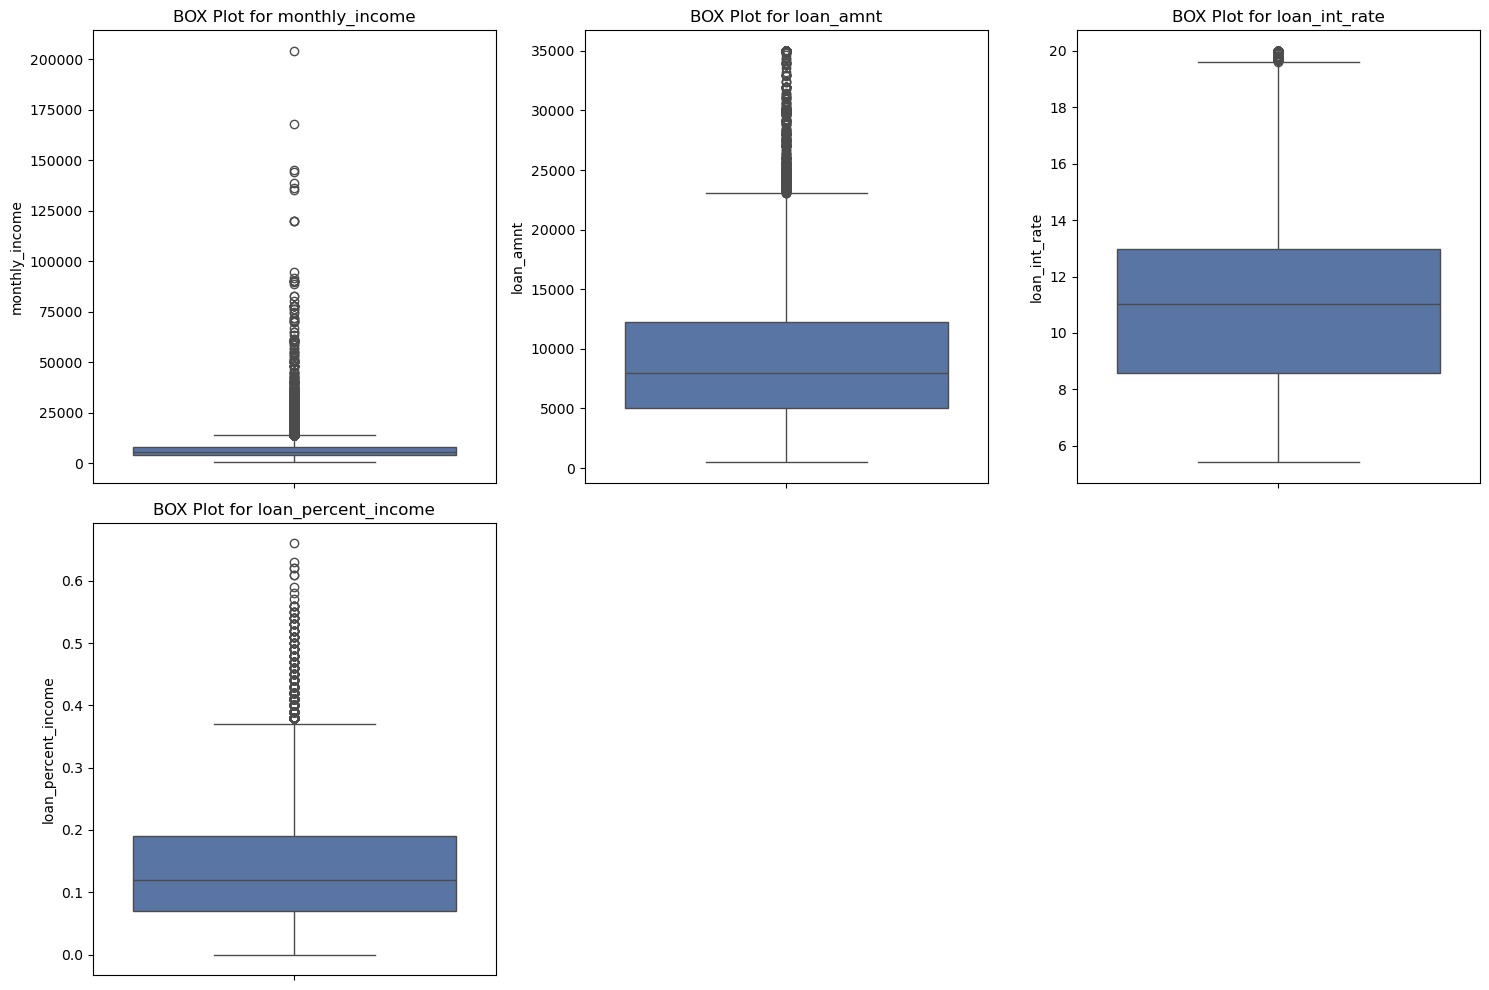

In [13]:
columns_to_plot = ['monthly_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
pd.set_option('display.float_format', '{:.2f}'.format)

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Loop through each column and plot a KDE plot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for subplot
    sns.boxplot(df[col])
    plt.title(f'BOX Plot for {col}')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
#We find actual conditional value by trial and error of dataframe with multiple experiments
df=df[(df['monthly_income'] <= 15000) & (df['loan_amnt'] <= 25000) & (df['loan_percent_income'] <= 0.4)].reset_index(drop=True)

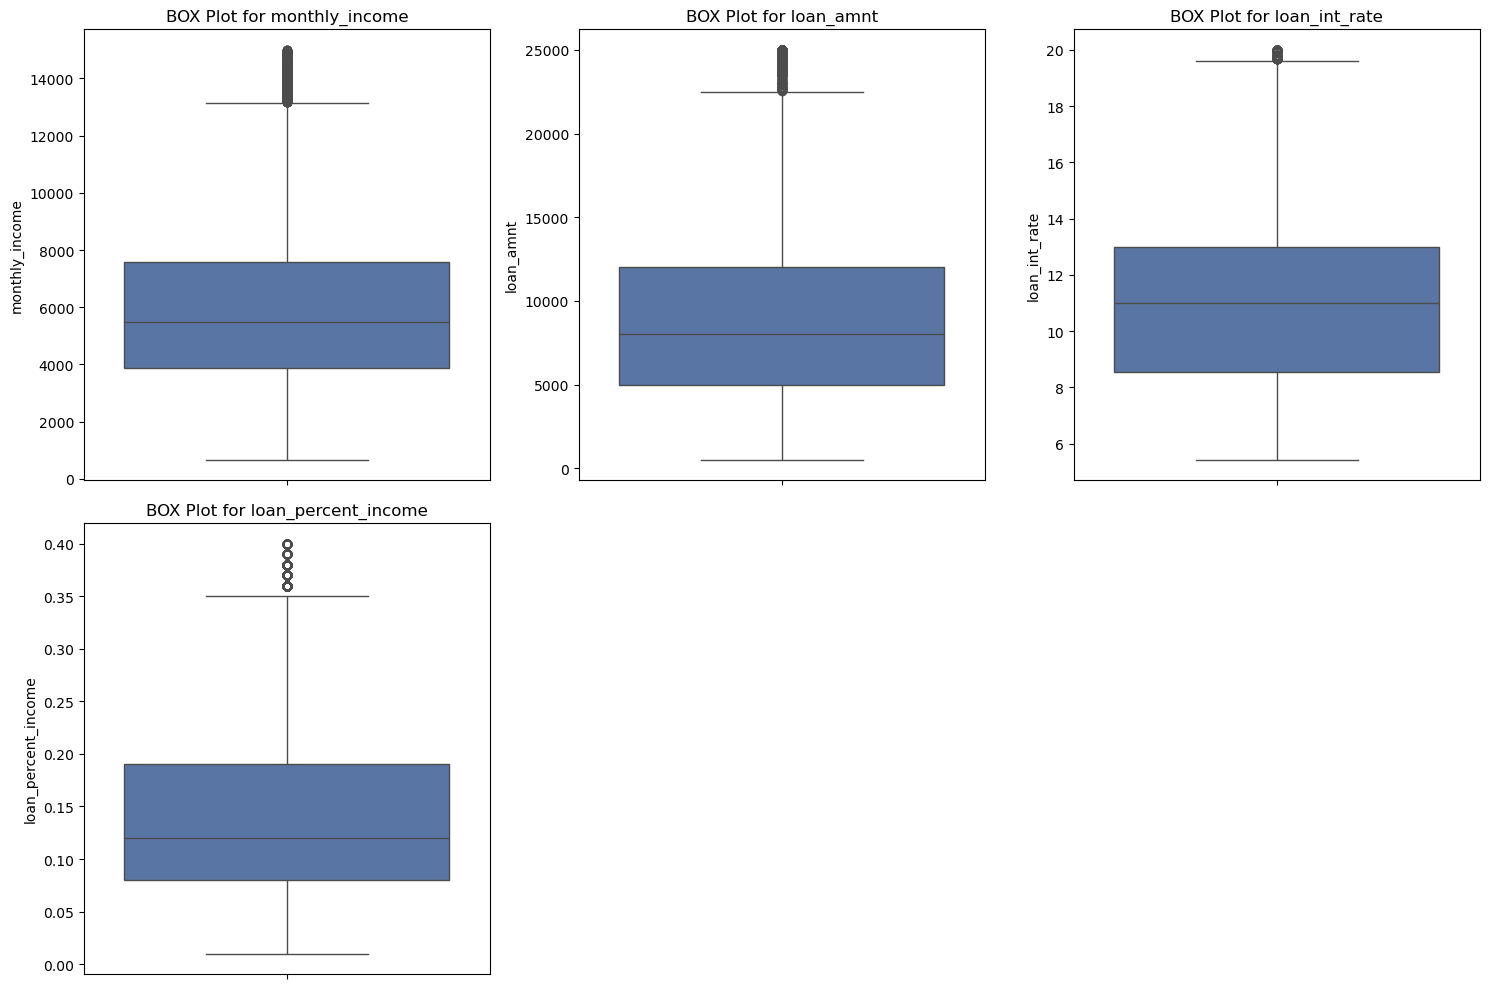

In [15]:
columns_to_plot = ['monthly_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Loop through each column and plot a KDE plot
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for subplot
    sns.boxplot(df[col])
    plt.title(f'BOX Plot for {col}')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
df[['monthly_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income','loan_status']].corr()

,monthly_income,loan_amnt,loan_int_rate,loan_percent_income,loan_status
monthly_income,1.00,0.39,-0.04,-0.34,-0.25
loan_amnt,0.39,1.00,0.13,0.65,0.10
loan_int_rate,-0.04,0.13,1.00,0.13,0.33
loan_percent_income,-0.34,0.65,0.13,1.00,0.37
loan_status,-0.25,0.10,0.33,0.37,1.00


<h2>Correlation Matrix Insights</h2>
<p>The correlation matrix for the given variables provides the following key insights:</p>
<ul>
  <li><strong>Monthly Income and Loan Amount (0.39):</strong> There is a moderate positive correlation, suggesting that higher monthly income applicants tend to request larger loan amounts.</li>
  <li><strong>Loan Amount and Loan Percent Income (0.65):</strong> A strong positive correlation, indicating that applicants requesting larger loan amounts allocate a significant portion of their income to loan repayment.</li>
  <li><strong>Loan Interest Rate and Loan Status (0.33):</strong> A moderate positive correlation, implying that loans with higher interest rates have a slightly higher likelihood of approval.</li>
  <li><strong>Loan Percent Income and Loan Status (0.37):</strong> A moderate positive correlation, suggesting that applicants who allocate a higher percentage of their income to loan repayment are more likely to have their loans approved.</li>
  <li><strong>Monthly Income and Loan Status (-0.25):</strong> A weak negative correlation, indicating that while income affects loan eligibility, other factors also influence loan approval, and a higher income does not always guarantee approval.</li>
</ul>
<h3>Conclusion:</h3>
<p><strong>Loan Approval Influencers:</strong> The most influential factors for loan approval are loan amount and loan percentage of income. These two variables show strong positive correlations with the likelihood of loan approval.</p>
<p>Loan Interest Rate also plays a role but with a moderate correlation.</p>
<p>Monthly Income shows a weaker negative correlation, indicating it is less directly tied to loan approval but can still impact the overall eligibility.</p>
<p>In summary, applicants with higher loan amounts and larger portions of their income allocated towards loan repayment are more likely to have their loans approved, regardless of their monthly income.</p>


Text(0.5, 1.0, 'monthly_income vs loan_amnt ')

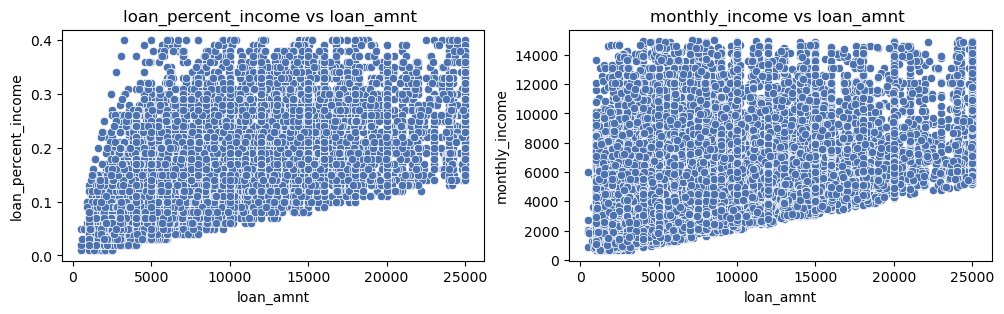

In [17]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
sns.scatterplot(df,y=df['loan_percent_income'],x=df['loan_amnt'])
plt.title('loan_percent_income vs loan_amnt ')


plt.subplot(1,2,2)
sns.scatterplot(df,y=df['monthly_income'],x=df['loan_amnt'])
plt.title('monthly_income vs loan_amnt ')

<h1 style='color:red;'>Loan Intent and History</h1>

In [18]:
df[['loan_intent','previous_loan_defaults_on_file']].head()

,loan_intent,previous_loan_defaults_on_file
0,EDUCATION,Yes
1,VENTURE,No
2,VENTURE,No
3,HOMEIMPROVEMENT,No
4,EDUCATION,No


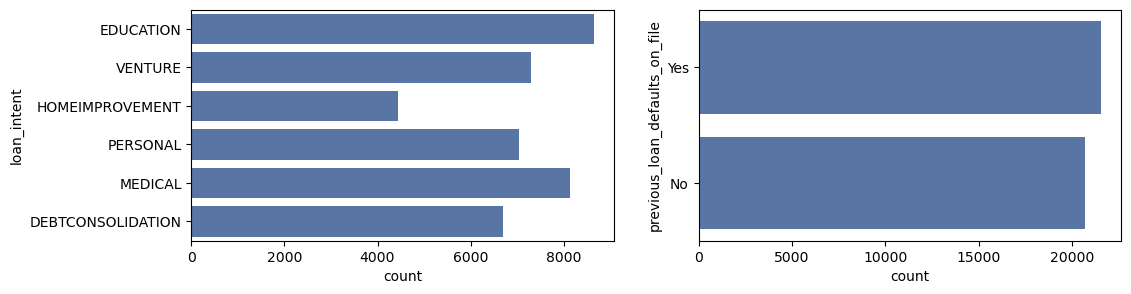

In [19]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
sns.countplot(df,y=df['loan_intent'])

plt.subplot(1,2,2)
sns.countplot(df,y=df['previous_loan_defaults_on_file'])

plt.show()

<h3>Conclusion:</h3>
<p>The majority of loan applicants seek loans for <strong>education</strong>, followed by <strong>medical</strong> and <strong>venture</strong> purposes, indicating that these are the most common loan intents.</p>
<p>A substantial portion of applicants have no <strong>previous loan defaults</strong> on file, with only a slightly higher number having defaults, which could imply that most applicants have a clean loan history.</p>
<p>In summary, most applicants are seeking loans for education and medical reasons, and while defaults are present, the majority of applicants have no previous loan defaults.</p>


<Axes: xlabel='loan_status'>

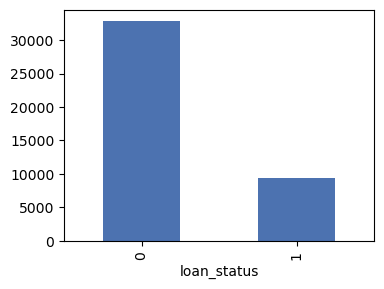

In [20]:
plt.figure(figsize=(4,3))
df['loan_status'].value_counts().plot(kind='bar')

In [21]:
df=df.drop(('person_income'),axis=1)

In [22]:
df.corr(numeric_only=True)['loan_status']

person_age            -0.02
loan_amnt              0.10
loan_int_rate          0.33
loan_percent_income    0.37
loan_status            1.00
monthly_income        -0.25
Name: loan_status, dtype: float64

In [23]:
df.head()

,person_age,person_gender,person_education,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,monthly_income
0,21.00,female,High School,OWN,1000.00,EDUCATION,11.14,0.08,Yes,0,1023.50
1,21.00,female,High School,OWN,2500.00,VENTURE,7.14,0.19,No,1,1079.25
2,21.00,female,High School,OWN,1600.00,VENTURE,14.74,0.13,No,1,1061.58
3,21.00,female,Associate,OWN,4500.00,HOMEIMPROVEMENT,8.63,0.34,No,1,1092.75
4,24.00,female,Master,MORTGAGE,1750.00,EDUCATION,10.99,0.12,No,1,1190.25


<h3 style='color:red;'>Multivariate analysis</h3>

<h4>Can you calculate and display the total loan amounts distributed for each gender?</h4>

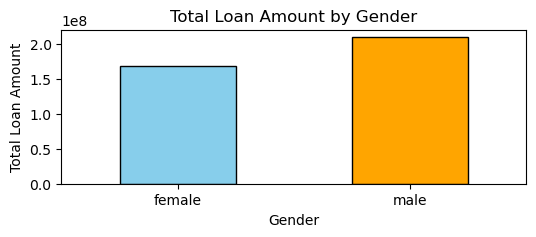

In [24]:
plt.figure(figsize=(6,2))
gender_grouped_data = df.groupby('person_gender')['loan_amnt'].sum().sort_values()
gender_grouped_data.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Total Loan Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=0)
plt.show()

<h4>Can you determine the total loan amounts distributed based on different categories of home ownership?</h4>

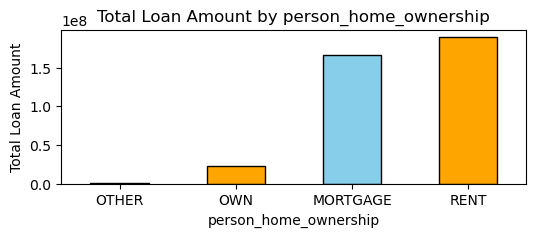

In [25]:
plt.figure(figsize=(6,2))
person_home_ownership_grouped_data = df.groupby('person_home_ownership')['loan_amnt'].sum().sort_values()
person_home_ownership_grouped_data.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Total Loan Amount by person_home_ownership')
plt.xlabel('person_home_ownership')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=0)
plt.show()

<h4>Can you analyze the total loan amounts distributed across different education levels?</h4>

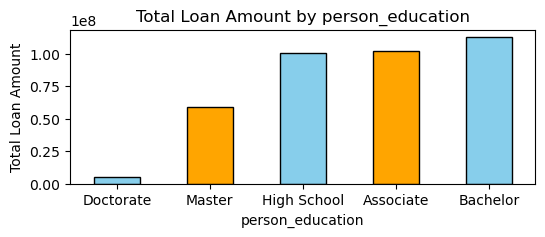

In [26]:
plt.figure(figsize=(6,2))
person_home_ownership_grouped_data = df.groupby('person_education')['loan_amnt'].sum().sort_values()
person_home_ownership_grouped_data.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Total Loan Amount by person_education')
plt.xlabel('person_education')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=0)
plt.show()

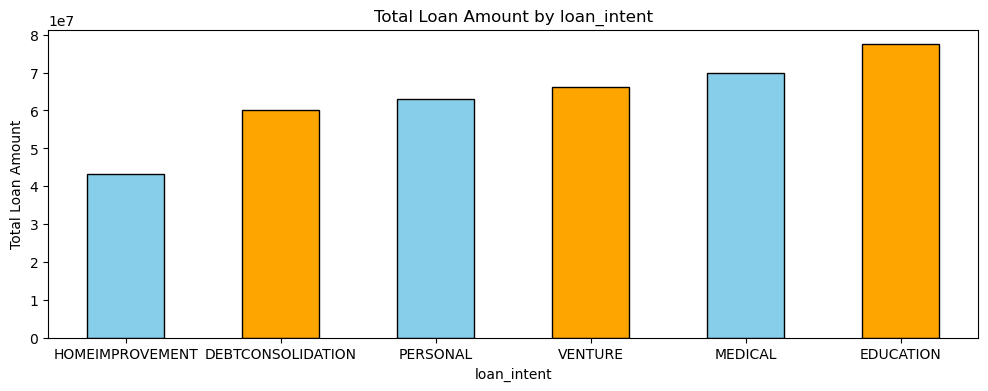

In [27]:
plt.figure(figsize=(12,4))
loan_intent_grouped_data = df.groupby('loan_intent')['loan_amnt'].sum().sort_values()
loan_intent_grouped_data.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

plt.title('Total Loan Amount by loan_intent')
plt.xlabel('loan_intent')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=0)
plt.show()

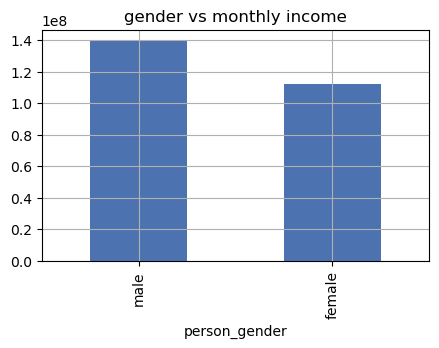

In [28]:
plt.figure(figsize=(5, 3))
df.groupby('person_gender')['monthly_income'].sum().sort_values().sort_values(ascending=False).plot(kind='bar')
plt.title('gender vs monthly income')
plt.grid()
plt.show()

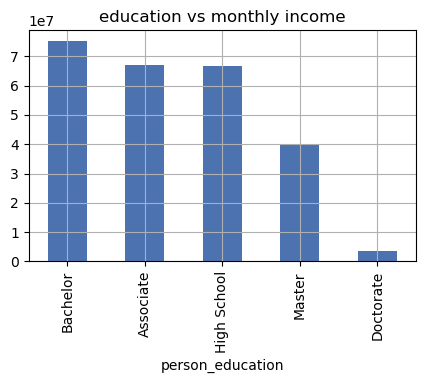

In [29]:
plt.figure(figsize=(5, 3))
df.groupby('person_education')['monthly_income'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('education vs monthly income')
plt.grid()
plt.show()

In [30]:
df.head()

,person_age,person_gender,person_education,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,monthly_income
0,21.00,female,High School,OWN,1000.00,EDUCATION,11.14,0.08,Yes,0,1023.50
1,21.00,female,High School,OWN,2500.00,VENTURE,7.14,0.19,No,1,1079.25
2,21.00,female,High School,OWN,1600.00,VENTURE,14.74,0.13,No,1,1061.58
3,21.00,female,Associate,OWN,4500.00,HOMEIMPROVEMENT,8.63,0.34,No,1,1092.75
4,24.00,female,Master,MORTGAGE,1750.00,EDUCATION,10.99,0.12,No,1,1190.25


<h3>Can you analyze the distribution of home ownership types (MORTGAGE, OTHER, OWN, RENT) across different education levels (Associate, Bachelor, Doctorate, High School, Master)?</h3>

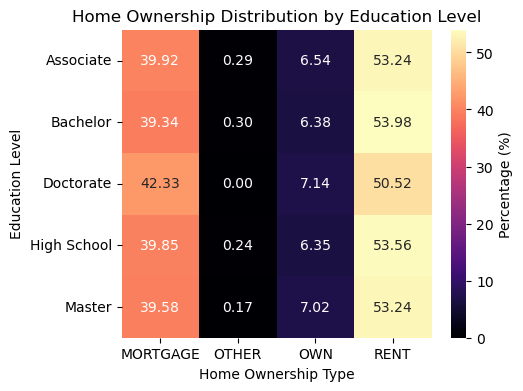

In [31]:
crosstab_percentage = pd.crosstab(df['person_education'], df['person_home_ownership'], normalize='index') * 100

plt.figure(figsize=(5, 4)) 
sns.heatmap(crosstab_percentage, annot=True, cmap='magma', fmt=".2f", cbar_kws={'label': 'Percentage (%)'})

plt.title('Home Ownership Distribution by Education Level')
plt.xlabel('Home Ownership Type')
plt.ylabel('Education Level')

# Display the plot
plt.show()

<h3>Can you analyze the percentage distribution of loan intent across different education levels?</h3>

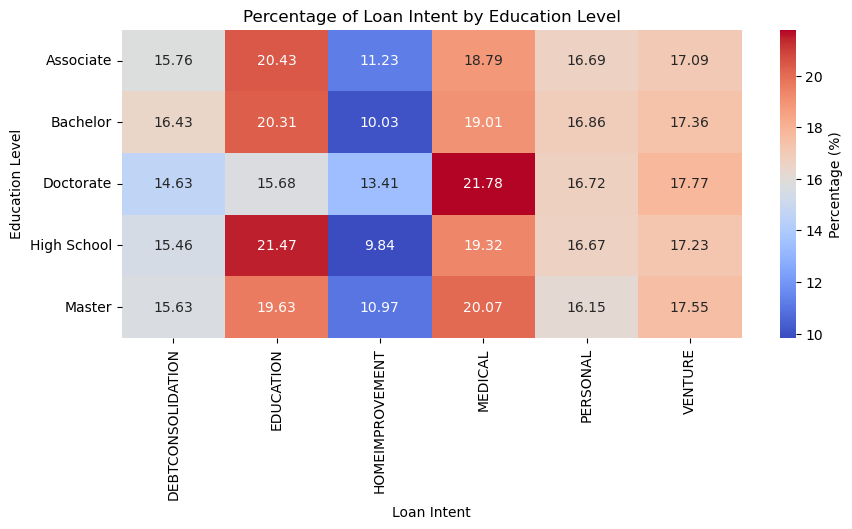

In [32]:
crosstab_percentage = pd.crosstab(df['person_education'], df['loan_intent'], normalize='index') * 100

plt.figure(figsize=(10, 4))  # Adjust size if needed
sns.heatmap(crosstab_percentage, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Percentage (%)'})

plt.title('Percentage of Loan Intent by Education Level')
plt.xlabel('Loan Intent')
plt.ylabel('Education Level')

plt.show()

In [33]:
df_copy=df.copy(deep=True)

In [34]:
df_copy.head()

,person_age,person_gender,person_education,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,monthly_income
0,21.00,female,High School,OWN,1000.00,EDUCATION,11.14,0.08,Yes,0,1023.50
1,21.00,female,High School,OWN,2500.00,VENTURE,7.14,0.19,No,1,1079.25
2,21.00,female,High School,OWN,1600.00,VENTURE,14.74,0.13,No,1,1061.58
3,21.00,female,Associate,OWN,4500.00,HOMEIMPROVEMENT,8.63,0.34,No,1,1092.75
4,24.00,female,Master,MORTGAGE,1750.00,EDUCATION,10.99,0.12,No,1,1190.25


In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

columns_to_encode = ['person_gender', 'person_education', 'person_home_ownership','loan_intent','previous_loan_defaults_on_file']

# Apply LabelEncoder to the selected columns
df[columns_to_encode] = df[columns_to_encode].apply(encoder.fit_transform)

In [36]:
df.head()

,person_age,person_gender,person_education,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status,monthly_income
0,21.00,0,3,2,1000.00,1,11.14,0.08,1,0,1023.50
1,21.00,0,3,2,2500.00,5,7.14,0.19,0,1,1079.25
2,21.00,0,3,2,1600.00,5,14.74,0.13,0,1,1061.58
3,21.00,0,0,2,4500.00,2,8.63,0.34,0,1,1092.75
4,24.00,0,4,0,1750.00,1,10.99,0.12,0,1,1190.25


In [37]:
df.corr()['loan_status'].sort_values(ascending=False)

loan_status                       1.00
loan_percent_income               0.37
loan_int_rate                     0.33
person_home_ownership             0.22
loan_amnt                         0.10
person_gender                    -0.00
person_education                 -0.00
person_age                       -0.02
loan_intent                      -0.07
monthly_income                   -0.25
previous_loan_defaults_on_file   -0.54
Name: loan_status, dtype: float64

**The weak or zero correlation of Gender, Education, Age, and Loan Intent with loan_status indicates that these demographic and intent-related factors do not significantly influence loan approval decisions. Instead, loan approval is more strongly influenced by financial history (e.g., previous loan defaults), monthly income, and loan-specific details (such as loan percentage and interest rate), which directly impact the applicant's financial stability and risk profile**

In [38]:
df.to_csv('loan_approval_dataset.csv')

In [39]:
df.columns

Index(['person_age', 'person_gender', 'person_education',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status',
       'monthly_income'],
      dtype='object')

In [40]:
x=df[['person_age', 'person_gender', 'person_education',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file',
       'monthly_income']]
y=df['loan_status']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()

# Fit and transform the data
x = scaler.fit_transform(x)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
x, y = smote.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:


def train_model(model, model_name):
    print(f'Model: {model_name}')
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Training Accuracy Score: {train_accuracy:.2f}')
    print(f'Testing Accuracy Score: {test_accuracy:.2f}')
    
    # Generate classification report for testing data
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(report)
    
    return model

In [44]:
model_list = dict(
    knn=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2),
    svc=SVC(kernel='linear', random_state=0),
    logistic=LogisticRegression(),
    naive=GaussianNB(),
    tree=DecisionTreeClassifier(criterion='entropy', random_state=0),
    forest=RandomForestClassifier(n_estimators=50, criterion="entropy"),
    xgboost=XGBClassifier(),
    gradientboost=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)
)
for key, value in model_list.items():
    print('*'*30)
    train_model(value,key)

******************************
Model: knn
Training Accuracy Score: 0.95
Testing Accuracy Score: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     10797
           1       0.88      0.97      0.92     10929

    accuracy                           0.92     21726
   macro avg       0.93      0.92      0.92     21726
weighted avg       0.93      0.92      0.92     21726

******************************
Model: svc
Training Accuracy Score: 0.87
Testing Accuracy Score: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     10797
           1       0.84      0.93      0.89     10929

    accuracy                           0.88     21726
   macro avg       0.88      0.88      0.88     21726
weighted avg       0.88      0.88      0.88     21726

******************************
Model: logistic
Training Accuracy Score: 0.87
Testing Accuracy Scor

In [46]:
x_train[0]

array([ 1.3314029 , -1.10806681, -1.17960971,  0.87952786, -0.60877633,
        1.2846673 ,  1.27189296, -0.93913119, -1.02081015,  0.72068918])

In [ ]:
xgboost_model=train_model(XGBClassifier(),'xgboost_model')
xgboost_model.predict(x_test)